In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=Warning)


Bad key savefig.frameon in file /opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file /opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file /opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probab

# Return Forecasting: Time Series Analysis & Modelling with CAD-PHY Exchange rate data.


In [2]:
# Currency pair exchange rates for CAD/JPY
cad_jpy_df = pd.read_csv("/Users/aliait/Desktop/cad_jpy.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)
cad_jpy_df.head()

,Price,Open,High,Low
Date,,,,
1982-01-05,184.65,184.65,184.65,184.65
1982-01-06,185.06,185.06,185.06,185.06
1982-01-07,186.88,186.88,186.88,186.88
1982-01-08,186.58,186.58,186.58,186.58
1982-01-11,187.64,187.64,187.64,187.64


In [3]:
# Trim the dataset to begin on January 1st, 1990
cad_jpy_df = cad_jpy_df.loc["1990-01-01":, :]
cad_jpy_df.head()

,Price,Open,High,Low
Date,,,,
1990-01-02,126.37,126.31,126.37,126.31
1990-01-03,125.30,125.24,125.30,125.24
1990-01-04,123.46,123.41,123.46,123.41
1990-01-05,124.54,124.48,124.54,124.48
1990-01-08,124.27,124.21,124.27,124.21


# Initial Time-Series Plotting

<AxesSubplot:title={'center':'CAD/JPY Exchange Rates'}, xlabel='Date'>

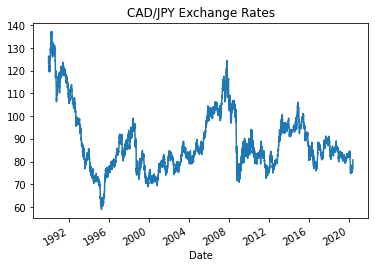

In [4]:
# Plot just the "Price" column from the dataframe:
cad_jpy_df.Price.plot(title="CAD/JPY Exchange Rates")

**Question:** Do you see any patterns, long-term and/or short? 

**Answer:** We see some resistance around 60 and 120, the rates fluctuates around those values. We do see some trends around 1997 during the Asian Currency Crisis. We see that the value of the JPY started decreasing around that time, we also see some major volatility and changes during the 2008 financial crisis with a sharp drop in the CAD/JPY rate.

---

# Decomposition Using a Hodrick-Prescott Filter

In [5]:
import statsmodels.api as sm

# Apply the Hodrick-Prescott Filter by decomposing the exchange rate price into two separate series:
ts_noise, ts_trend = sm.tsa.filters.hpfilter(cad_jpy_df["Price"]) 

In [6]:
# Create a dataframe of just the exchange rate price, and add columns for "noise" and "trend" series from above:
ns_df=pd.DataFrame(cad_jpy_df["Price"])
ns_df["Noise"]=ts_noise
ns_df["Trend"]=ts_trend
ns_df.head()

,Price,Noise,Trend
Date,,,
1990-01-02,126.37,0.519095,125.850905
1990-01-03,125.30,-0.379684,125.679684
1990-01-04,123.46,-2.048788,125.508788
1990-01-05,124.54,-0.798304,125.338304
1990-01-08,124.27,-0.897037,125.167037


<AxesSubplot:title={'center':'Price vs. Trend'}, xlabel='Date'>

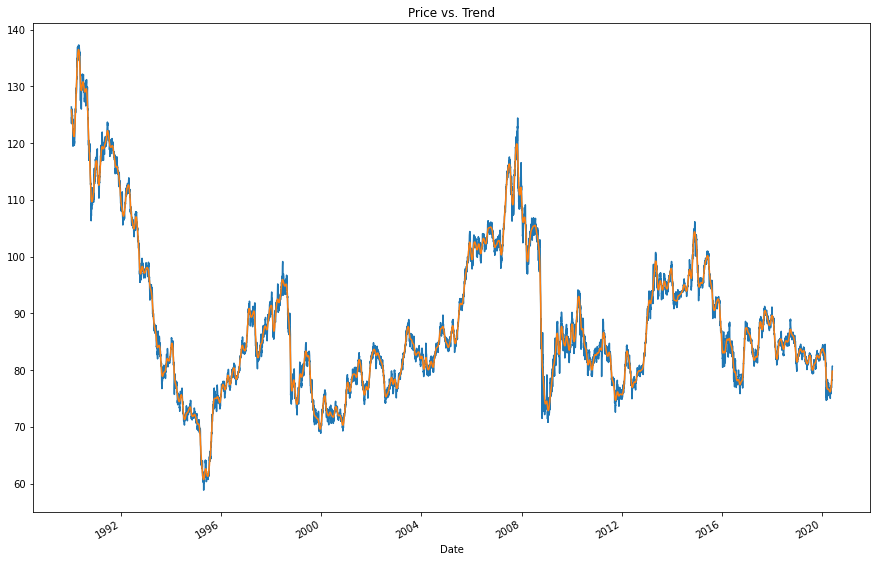

In [7]:
# Plot the Exchange Rate Price vs. the Trend for 2015 to the present
ns_df.Price.plot(title="Price vs. Trend",figsize=(15,10))
ns_df.Trend.plot()

**Question:** Do you see any patterns, long-term and/or short?

**Answer:** Similar to the similar observation, hard to determine a pattern but we see resistance around 60 and 120 while most of the exchange rate actually fluctuates around 70 and 110. For the long term, we could see the rate going high again around the 100s before dropping. 

<AxesSubplot:title={'center':'Noise'}, xlabel='Date'>

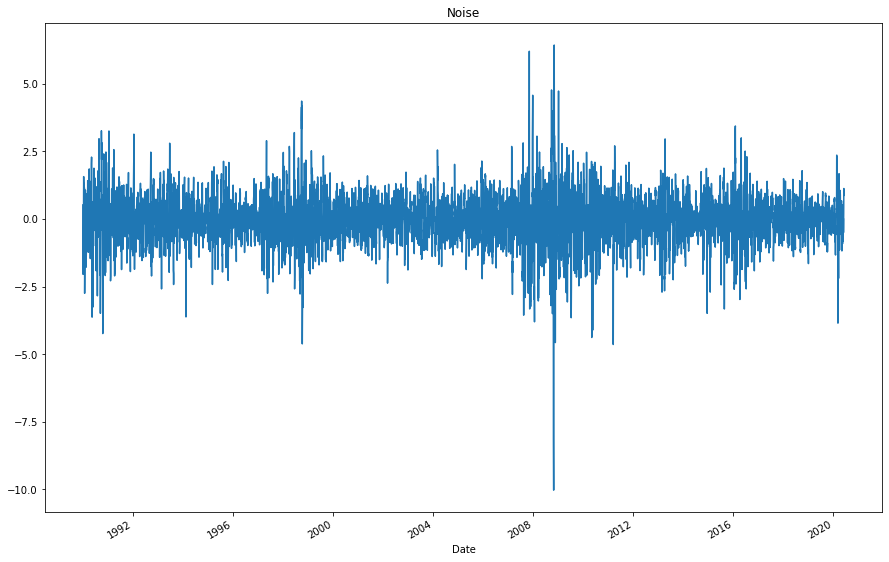

In [8]:
# Plot the Settle Noise
ns_df.Noise.plot(title="Noise",figsize=(15,10))

---

# Forecasting Returns using an ARMA Model

In [9]:
# Create a series using "Price" percentage returns, drop any nan"s, and check the results:
# (Make sure to multiply the pct_change() results by 100)
# In this case, you may have to replace inf, -inf values with np.nan"s
returns = (cad_jpy_df[["Price"]].pct_change() * 100)
returns = returns.replace(-np.inf, np.nan).dropna()
returns.tail()

,Price
Date,
2020-05-29,0.076697
2020-06-01,1.251756
2020-06-02,1.425508
2020-06-03,0.373134
2020-06-04,0.012392


In [10]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA 
# Estimate and ARMA model using statsmodels (use order=(2, 1))
arma_model = ARMA(returns.values, order=(2,1)) 
# Fit the model and assign it to a variable called results
arma_results = arma_model.fit() 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23010D+00    |proj g|=  3.45568D-04

At iterate    5    f=  1.23010D+00    |proj g|=  3.60378D-05

At iterate   10    f=  1.23010D+00    |proj g|=  3.51208D-04

At iterate   15    f=  1.23008D+00    |proj g|=  2.32743D-03

At iterate   20    f=  1.23007D+00    |proj g|=  2.26485D-05

At iterate   25    f=  1.23007D+00    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     34      1     0     0   

In [11]:
# Output model summary results:
arma_results.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 7928
Model:                     ARMA(2, 1)   Log Likelihood               -9751.978
Method:                       css-mle   S.D. of innovations              0.828
Date:                Thu, 28 Apr 2022   AIC                          19513.955
Time:                        22:06:36   BIC                          19548.846
Sample:                             0   HQIC                         19525.903
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0022      0.009     -0.245      0.807      -0.020       0.016
ar.L1.y       -0.8547      0.164     -5.200      0.000      -1.177      -0.533
ar.L2.y       -0.0197      0.013     -1.475      0.140      -0.046       0.006
ma.L1.y        0.8246      0.164      5.030      0.000       0.503       1.146
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.2033           +0.0000j            1.2033            0.5000
AR.2          -42.1698           +0.0000j           42.1698            0.5000
MA.1           -1.2127           +0.0000j            1.2127            0.5000
-----------------------------------------------------------------------------
"""

<AxesSubplot:title={'center':'5 Day Return Forecast'}>

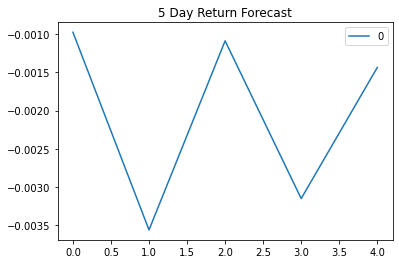

In [12]:
# Plot the 5 Day Returns Forecast
pd.DataFrame(arma_results.forecast(steps=5)[0]).plot(title="5 Day Return Forecast") 

**Question:** Based on the p-value, is the model a good fit?

**Answer:** The p-value for this ARMA model is higher than our set confindence levels, and therefore this model is not a good fit.

---

# Forecasting the Exchange Rate Price using an ARIMA Model

In [13]:
from statsmodels.tsa.arima_model import ARIMA

# Estimate and ARIMA Model:
arima_model = ARIMA(cad_jpy_df["Price"], order=(5,1,1))

# Fit the model
arima_results = arima_model.fit()

/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10313D+00    |proj g|=  1.93001D-04

At iterate    5    f=  1.10313D+00    |proj g|=  5.79536D-06

At iterate   10    f=  1.10313D+00    |proj g|=  3.35287D-05

At iterate   15    f=  1.10313D+00    |proj g|=  4.83391D-05

At iterate   20    f=  1.10313D+00    |proj g|=  4.88498D-07


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     22     34      1     0     0   8.882D-08   1.103D+00
  F =   1.1031309576186830     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [14]:
# Output model summary results:
arima_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Price   No. Observations:                 7928
Model:                 ARIMA(5, 1, 1)   Log Likelihood               -8745.622
Method:                       css-mle   S.D. of innovations              0.729
Date:                Thu, 28 Apr 2022   AIC                          17507.244
Time:                        22:06:38   BIC                          17563.070
Sample:                             1   HQIC                         17526.361
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0058      0.008     -0.743      0.458      -0.021       0.009
ar.L1.D.Price     0.4287      0.246      1.740      0.082      -0.054       0.912
ar.L2.D.Price     0.0177      0.014      1.264      0.206      -0.010       0.045
ar.L3.D.Price    -0.0118      0.012     -0.959      0.337      -0.036       0.012
ar.L4.D.Price     0.0110      0.012      0.879      0.379      -0.013       0.035
ar.L5.D.Price    -0.0191      0.011     -1.702      0.089      -0.041       0.003
ma.L1.D.Price    -0.4568      0.246     -1.855      0.064      -0.939       0.026
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.7660           -0.7703j            1.9266           -0.0655
AR.2            1.7660           +0.7703j            1.9266            0.0655
AR.3           -2.3649           -0.0000j            2.3649           -0.5000
AR.4           -0.2974           -2.4212j            2.4394           -0.2695
AR.5           -0.2974           +2.4212j            2.4394            0.2695
MA.1            2.1894           +0.0000j            2.1894            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:title={'center':'5 Day Future Price Forecast'}>

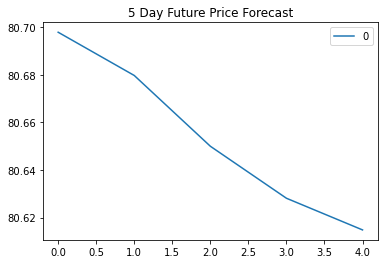

In [15]:
# Plot the 5 Day Price Forecast
pd.DataFrame(arima_results.forecast(steps=5)[0]).plot(title="5 Day Future Price Forecast") 

**Question:** What does the model forecast will happen to the Japanese Yen in the near term?

**Answer:** Based on the ARIMA model forecast, with set values of P=5, D=1, and Q=1 the Japanese Yen will gain value in the near term. We see the forecast that the raw price is dropping from 80.70 to 80.62 which means its getting stronger as a comparaison to the canadian dollar. We have to take in consideration that this model is not perfect as the p-values are high.

---

# Volatility Forecasting with GARCH

Rather than predicting returns, let's forecast near-term **volatility** of Japanese Yen exchange rate returns. Being able to accurately predict volatility will be extremely useful if we want to trade in derivatives or quantify our maximum loss.
 

In [16]:
import arch as arch
from arch import arch_model

In [17]:
# Estimate a GARCH model:
garch_model = arch_model(returns, mean="Zero", vol="GARCH", p=2, q=1) 
# Fit the model
garch_results = garch_model.fit(disp="off") 

In [18]:
# Summarize the model results
garch_results.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -8911.02
Distribution:                  Normal   AIC:                           17830.0
Method:            Maximum Likelihood   BIC:                           17858.0
                                        No. Observations:                 7928
Date:                Thu, Apr 28 2022   Df Residuals:                     7928
Time:                        22:06:39   Df Model:                            0
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      9.0733e-03  2.545e-03      3.566  3.628e-04  [4.086e-03,1.406e-02]
alpha[1]       0.0624  1.835e-02      3.402  6.682e-04  [2.647e-02,9.841e-02]
alpha[2]       0.0000  2.010e-02      0.000      1.000 [-3.940e-02,3.940e-02]
beta[1]        0.9243  1.229e-02     75.205      0.000      [  0.900,  0.948]
=============================================================================

Covariance estimator: robust
"""

**Note:** Our p-values for GARCH and volatility forecasts tend to be much lower than our ARMA/ARIMA return and price forecasts. In particular, here we have all p-values of less than 0.05, except for alpha(2), indicating overall a much better model performance. In practice, in financial markets, it's easier to forecast volatility than it is to forecast returns or prices. (After all, if we could very easily predict returns, we'd all be rich!)

In [19]:
# Find the last day of the dataset
last_day = returns.index.max().strftime('%Y-%m-%d')
last_day

'2020-06-04'

In [20]:
# Create a 5 day forecast of volatility
forecast_horizon = 5

# Start the forecast using the last_day calculated above
forecasts = garch_results.forecast(start='2020-06-04', horizon=forecast_horizon)
forecasts

In [21]:
# Annualize the forecast
intermediate = np.sqrt(forecasts.variance.dropna() * 252)
intermediate.head()

,h.1,h.2,h.3,h.4,h.5
Date,,,,,
2020-06-04,12.566029,12.573718,12.581301,12.588778,12.596153


In [22]:
# Transpose the forecast so that it is easier to plot
final = intermediate.dropna().T
final.head()

Date,2020-06-04
h.1,12.566029
h.2,12.573718
h.3,12.581301
h.4,12.588778
h.5,12.596153


<AxesSubplot:>

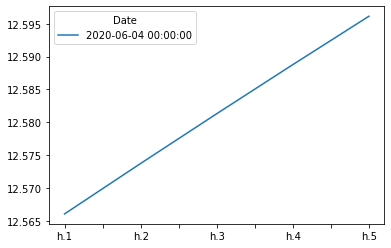

In [23]:
# Plot the final forecast
final.plot()

**Question:** What does the model forecast will happen to volatility in the near term?

**Answer:** The GARCH Model forecast that the volatility will increase in the near term.

---

# Conclusions

1. Based on your time series analysis, would you buy the yen now?

The prediction shows that the YEN will gain in value in the near term, so I would buy it now.

2. Is the risk of the yen expected to increase or decrease?

The risk of thhe yen is expected to increase in the near term, which could lead to higher return as our ARIMA model showed positive outcomes for the yen in the near term. I personally love to take calculated risk and this case seems perfect for me to invest on.

3. Based on the model evaluation, would you feel confident in using these models for trading?

I would use the combination of the models covered above in addition to other prediction tools such as Monte-Carlo simulation or Linear Regression models to make my trading decisions